In [1]:
import os
os.chdir('/home/user/src')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from omegaconf import OmegaConf
import hydra
cfg = OmegaConf.load('/home/user/src/configs/default.yaml')
dl = hydra.utils.instantiate(cfg.dataset,train_val_key="train")

++++++++++++++++++++++++
Number of sampels for train
AnnualCrop --> 168
HerbaceousVegetation --> 175
Industrial --> 137
PermanentCrop --> 123
River --> 129
Forest --> 135
Highway --> 108
Pasture --> 130
Residential --> 158
SeaLake --> 137


# check data distribution

In [4]:
H = np.zeros((13,200))
bins=np.linspace(0,1,201)

for i in range(len(dl)):
    
    batch = dl.__getitem__(i)
    s2=batch["s2"]
    
    for c in range(s2.shape[0]):
        data = s2[c].flatten()
        H[c] += np.histogram(data,bins=bins)[0]

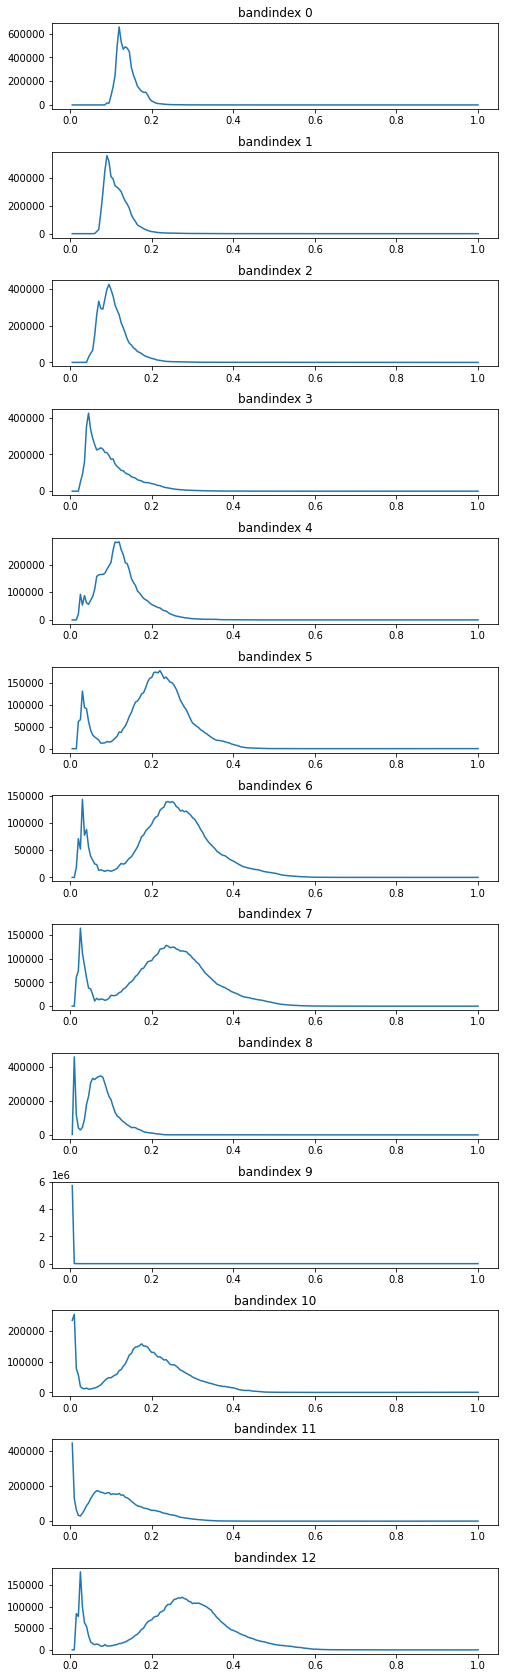

In [5]:
f,loax = plt.subplots(13,1,figsize=(8,30))
plt.subplots_adjust(hspace=.5)
for c in range(13):
    loax[c].plot(bins[1:],H[c])
    loax[c].set_title(f"bandindex {c}")
plt.show()

# check label banlance

In [6]:
all_labels = []
for i in range(len(dl)):
    batch = dl.__getitem__(i)
    l=batch["label"]
    all_labels.append(l.item())

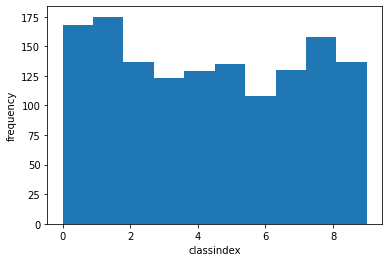

In [7]:
plt.hist(all_labels)
plt.xlabel("classindex")
plt.ylabel("frequency")
plt.show()

# show one img

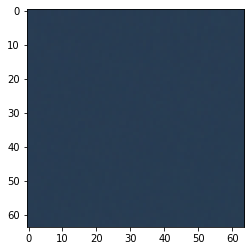

In [9]:
B,G,R = s2[1:4]
x = np.stack([R,G,B],axis=-1)
x = np.clip(x*4,0,1) # make it brighter
plt.imshow(x)
plt.show()